<a href="https://colab.research.google.com/github/Aayushktyagi/Pytorch_resources/blob/master/torchAutoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Notebook conatins following
Loading mnist data 

*   Loading Mnist dataset 
*   Create Autoencoder 
*   Visualize predictions 




In [2]:
import torch
import torchvision
import torchvision.datasets as dset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn as nn
from torch.autograd import Variable
import numpy as np
from time import time

In [6]:
# Hyper parameters
latent_dim = 64
batch_size = 128
LR = 0.005
Download_mnist = True
epochs = 10

In [4]:
# Load dataset 
dataset = dset.MNIST(root = './data',
                     train = True,
                     transform = transforms.ToTensor(),
                     download = Download_mnist)

data_loader = torch.utils.data.DataLoader(dataset = dataset , 
                                          batch_size = batch_size,
                                          shuffle = True)

In [5]:
# to cuda

def to_cuda(x):
  if torch.cuda.is_available():
    x = x.cuda()
  return Variable(x)




In [7]:
# Define model

class Autoencoder(nn.Module):
  def __init__(self , in_dim = 784 , h_dim = 400):
    super(Autoencoder ,self).__init__()

    self.encoder = nn.Sequential(
        nn.Linear(in_dim , h_dim),
        nn.ReLU()
    )

    self.decoder = nn.Sequential(
        nn.Linear(h_dim , in_dim),
        nn.Sigmoid()
    )

  def forward(self , x):
    out = self.encoder(x)
    out = self.decoder(out)

    return out 

ae = Autoencoder(in_dim = 784 , h_dim = latent_dim)

if torch.cuda.is_available():
  ae.cuda()


In [8]:
# loss
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(ae.parameters() , lr = LR)


In [9]:
# training 
data_iter = iter(data_loader)
t0 = time()


for epoch in range(epochs):
  for i, (images,_) in enumerate(data_loader):
    # flatten image 
    images = to_cuda(images.view(images.size(0),-1))
    out = ae(images)
    loss = criterion(out ,images)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 100 == 0:
            print ('Epoch [%d/%d], Iter [%d/%d] Loss: %.4f Time: %.2fs' 
                %(epoch+1, epochs, i+1, len(dataset)//batch_size, loss.item(), time()-t0))


Epoch [1/10], Iter [100/468] Loss: 0.1719 Time: 1.82s
Epoch [1/10], Iter [200/468] Loss: 0.1327 Time: 3.59s
Epoch [1/10], Iter [300/468] Loss: 0.1212 Time: 5.42s
Epoch [1/10], Iter [400/468] Loss: 0.1072 Time: 7.19s
Epoch [2/10], Iter [100/468] Loss: 0.0952 Time: 10.18s
Epoch [2/10], Iter [200/468] Loss: 0.0918 Time: 11.99s
Epoch [2/10], Iter [300/468] Loss: 0.0885 Time: 13.79s
Epoch [2/10], Iter [400/468] Loss: 0.0888 Time: 15.57s
Epoch [3/10], Iter [100/468] Loss: 0.0907 Time: 18.54s
Epoch [3/10], Iter [200/468] Loss: 0.0906 Time: 20.32s
Epoch [3/10], Iter [300/468] Loss: 0.0896 Time: 22.08s
Epoch [3/10], Iter [400/468] Loss: 0.0867 Time: 23.88s
Epoch [4/10], Iter [100/468] Loss: 0.0935 Time: 26.84s
Epoch [4/10], Iter [200/468] Loss: 0.0881 Time: 28.66s
Epoch [4/10], Iter [300/468] Loss: 0.0884 Time: 30.42s
Epoch [4/10], Iter [400/468] Loss: 0.0926 Time: 32.18s
Epoch [5/10], Iter [100/468] Loss: 0.0906 Time: 35.15s
Epoch [5/10], Iter [200/468] Loss: 0.0905 Time: 36.89s
Epoch [5/10], 

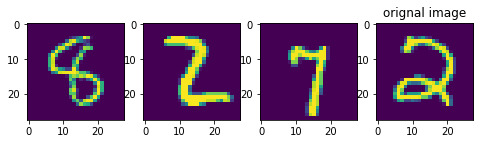

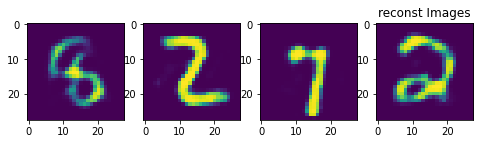

In [31]:
def img_transpose(img):
  npimg = img.numpy()
  npimg = np.transpose(npimg , (1,2,0))
  return npimg

def img_subplot(imgs , title):
  w=10
  h=10
  fig=plt.figure(figsize=(8, 8))
  columns = 4
  rows = 1
  for i in range(1, columns*rows +1):
      img = imgs[i]
      fig.add_subplot(rows, columns, i)
      plt.imshow(img.reshape(28,28))
  plt.title(title)
  plt.show()

# show orignal images 
images ,_ = next(iter(data_loader))
img_subplot(images , "orignal image")

# show reconstructed images
flat_x = to_cuda(images.view(images.size(0), -1))
reconstructed_img = ae(flat_x)
reconstrcuted_img = reconstructed_img.view(reconstructed_img.size(0),1,28,28)
reconstrcuted_img = reconstrcuted_img.data.cpu()
renpimg = reconstrcuted_img.numpy()
renpimg = np.transpose(renpimg , (0,2,3,1))
img_subplot(renpimg , "reconst Images")
